In [35]:
# import dependencies
from api_keys import census_key
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from census import Census
import hvplot.pandas
import scipy.stats as st

In [15]:
# import csv files
pop_df = pd.read_csv("pop_change.csv")
add_data_df = pd.read_csv("state_without_in.csv")
# rename STATE column to State
pop_df.rename(columns={"STATE": "State"}, inplace=True)
# merge dataframes
state_df = pd.merge(pop_df, add_data_df, on="State")
state_df

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_2015-2016,POP_CHANGE_2016-2017,POP_CHANGE_2017-2018,POP_CHANGE_2018-2019,POP_CHANGE_2019-2020,POP_CHANGE_2020-2021,POP_CHANGE_TOTAL,Poverty Rate,Unemployment Rate,Percentage without Health Insurance
0,Alabama,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,4321.0,11447.0,13124.0,15314.0,121618.0,15074.0,180898.0,15.8,5.4,9.7
1,Alaska,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,3462.0,-2099.0,-2357.0,-5893.0,896.0,232.0,-5759.0,10.4,6.9,12.2
2,Arizona,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,103006.0,85199.0,155376.0,107071.0,-100731.0,98330.0,448251.0,13.5,5.6,10.7
3,Arkansas,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,10044.0,16031.0,9546.0,3979.0,-5572.0,13659.0,47687.0,16.0,5.3,8.7
4,California,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39499738.0,39237836.0,105199.0,286636.0,20392.0,-44822.0,-12485.0,-261902.0,93018.0,12.3,6.5,7.2
5,Colorado,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,83971.0,66609.0,88410.0,63172.0,25572.0,27761.0,355495.0,9.6,4.6,7.9
6,Connecticut,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,-14434.0,11732.0,-15519.0,-7378.0,34973.0,5337.0,14711.0,10.0,6.1,5.2
7,Delaware,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,6131.0,9874.0,5232.0,6593.0,18122.0,11498.0,57450.0,11.4,5.7,5.8
8,District of Columbia,672228.0,681170.0,693972.0,702455.0,705749.0,690093.0,670050.0,8942.0,12802.0,8483.0,3294.0,-15656.0,-20043.0,-2178.0,15.4,7.1,3.4
9,Florida,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,341167.0,371961.0,314925.0,178412.0,92195.0,211196.0,1509856.0,13.1,5.3,12.6


In [16]:
# find total population increase as a percentage and add to dataframe
state_df["POP_CHANGE_PCT"] = (state_df["POP_CHANGE_TOTAL"] / state_df["POP_2015"]) * 100
state_df

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_2015-2016,POP_CHANGE_2016-2017,POP_CHANGE_2017-2018,POP_CHANGE_2018-2019,POP_CHANGE_2019-2020,POP_CHANGE_2020-2021,POP_CHANGE_TOTAL,Poverty Rate,Unemployment Rate,Percentage without Health Insurance,POP_CHANGE_PCT
0,Alabama,4858979.0,4863300.0,4874747.0,4887871.0,4903185.0,5024803.0,5039877.0,4321.0,11447.0,13124.0,15314.0,121618.0,15074.0,180898.0,15.8,5.4,9.7,3.722963
1,Alaska,738432.0,741894.0,739795.0,737438.0,731545.0,732441.0,732673.0,3462.0,-2099.0,-2357.0,-5893.0,896.0,232.0,-5759.0,10.4,6.9,12.2,-0.779896
2,Arizona,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,103006.0,85199.0,155376.0,107071.0,-100731.0,98330.0,448251.0,13.5,5.6,10.7,6.564832
3,Arkansas,2978204.0,2988248.0,3004279.0,3013825.0,3017804.0,3012232.0,3025891.0,10044.0,16031.0,9546.0,3979.0,-5572.0,13659.0,47687.0,16.0,5.3,8.7,1.601200
4,California,39144818.0,39250017.0,39536653.0,39557045.0,39512223.0,39499738.0,39237836.0,105199.0,286636.0,20392.0,-44822.0,-12485.0,-261902.0,93018.0,12.3,6.5,7.2,0.237625
5,Colorado,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,83971.0,66609.0,88410.0,63172.0,25572.0,27761.0,355495.0,9.6,4.6,7.9,6.514985
6,Connecticut,3590886.0,3576452.0,3588184.0,3572665.0,3565287.0,3600260.0,3605597.0,-14434.0,11732.0,-15519.0,-7378.0,34973.0,5337.0,14711.0,10.0,6.1,5.2,0.409676
7,Delaware,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,6131.0,9874.0,5232.0,6593.0,18122.0,11498.0,57450.0,11.4,5.7,5.8,6.073362
8,District of Columbia,672228.0,681170.0,693972.0,702455.0,705749.0,690093.0,670050.0,8942.0,12802.0,8483.0,3294.0,-15656.0,-20043.0,-2178.0,15.4,7.1,3.4,-0.323997
9,Florida,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,341167.0,371961.0,314925.0,178412.0,92195.0,211196.0,1509856.0,13.1,5.3,12.6,7.448255


In [17]:
# sort dataframe by population change percentage
sorted_pop_df = state_df.sort_values(by=["POP_CHANGE_PCT"], ascending=False)
sorted_pop_df

,State,POP_2015,POP_2016,POP_2017,POP_2018,POP_2019,POP_2020,POP_2021,POP_CHANGE_2015-2016,POP_CHANGE_2016-2017,POP_CHANGE_2017-2018,POP_CHANGE_2018-2019,POP_CHANGE_2019-2020,POP_CHANGE_2020-2021,POP_CHANGE_TOTAL,Poverty Rate,Unemployment Rate,Percentage without Health Insurance,POP_CHANGE_PCT
12,Idaho,1654930.0,1683140.0,1716943.0,1754208.0,1787065.0,1847772.0,1900923.0,28210.0,33803.0,37265.0,32857.0,60707.0,53151.0,245993.0,11.4,4.0,10.2,14.864254
45,Utah,2995919.0,3051217.0,3101833.0,3161105.0,3205958.0,3281684.0,3337975.0,55298.0,50616.0,59272.0,44853.0,75726.0,56291.0,342056.0,8.8,3.5,9.0,11.417398
28,Nevada,2890845.0,2940058.0,2998039.0,3034392.0,3080156.0,3114071.0,3143991.0,49213.0,57981.0,36353.0,45764.0,33915.0,29920.0,253146.0,12.9,7.1,11.3,8.756817
48,Washington,7170351.0,7288000.0,7405743.0,7535591.0,7614893.0,7718785.0,7738692.0,117649.0,117743.0,129848.0,79302.0,103892.0,19907.0,568341.0,10.0,5.1,6.4,7.926265
44,Texas,27469114.0,27862596.0,28304596.0,28701845.0,28995881.0,29217653.0,29527941.0,393482.0,442000.0,397249.0,294036.0,221772.0,310288.0,2058827.0,14.0,5.4,17.6,7.495062
9,Florida,20271272.0,20612439.0,20984400.0,21299325.0,21477737.0,21569932.0,21781128.0,341167.0,371961.0,314925.0,178412.0,92195.0,211196.0,1509856.0,13.1,5.3,12.6,7.448255
26,Montana,1032949.0,1042520.0,1050493.0,1062305.0,1068778.0,1086193.0,1104271.0,9571.0,7973.0,11812.0,6473.0,17415.0,18078.0,71322.0,12.5,4.1,8.6,6.904697
2,Arizona,6828065.0,6931071.0,7016270.0,7171646.0,7278717.0,7177986.0,7276316.0,103006.0,85199.0,155376.0,107071.0,-100731.0,98330.0,448251.0,13.5,5.6,10.7,6.564832
5,Colorado,5456574.0,5540545.0,5607154.0,5695564.0,5758736.0,5784308.0,5812069.0,83971.0,66609.0,88410.0,63172.0,25572.0,27761.0,355495.0,9.6,4.6,7.9,6.514985
7,Delaware,945934.0,952065.0,961939.0,967171.0,973764.0,991886.0,1003384.0,6131.0,9874.0,5232.0,6593.0,18122.0,11498.0,57450.0,11.4,5.7,5.8,6.073362


In [18]:
# output csv of sorted dataframe
sorted_pop_df.to_csv("state_pop_change_sorted.csv", index=False)

In [19]:
# create bar chart of population change percentage
state_plot = state_df.hvplot.bar(x="State", y="POP_CHANGE_PCT", color='POP_CHANGE_PCT', cmap='Purples', rot=90, title="Population Percentage Change by State (2015-2021)", xlabel="State", ylabel="Population Change (%)",c='POP_CHANGE_PCT', colorbar=True, height=1000, width=1500)
state_plot

:Bars   [State]   (POP_CHANGE_PCT)

In [20]:
# create bar chart of population change total
state_plot2 = state_df.hvplot.bar(x="State", y="POP_CHANGE_TOTAL", color='POP_CHANGE_TOTAL', cmap='Blues', rot=90, title="Population Total Change by State (2015-2021)", xlabel="State", ylabel="Population Change (Total)",c='POP_CHANGE_TOTAL', colorbar=True, height=1000, width=1500)
state_plot2

:Bars   [State]   (POP_CHANGE_TOTAL)

In [31]:
# exclude Puerto Rico from dataframe
state_df2 = state_df[state_df.State != "Puerto Rico"]
# create new dataframe with the top 25 states in unemployment rate
state_unem_df = state_df2.sort_values(by=["Unemployment Rate"], ascending=False).head(25)
# create a plot of population change percentage vs unemployment rate
state_plot3 = state_unem_df.hvplot.scatter(x="POP_CHANGE_PCT", y="Unemployment Rate", color='State', title="Population Percentage Change vs Unemployment Rate by State (2015-2021)", xlabel="Population Change (%)", ylabel="Unemployment Rate (%)",c='POP_CHANGE_PCT',size=80, colorbar=True, height=1000, width=1500)
state_plot3

:Scatter   [POP_CHANGE_PCT]   (Unemployment Rate,State)

In [44]:
# create a plot of population change total vs unemployment rate
state_plot6 = state_unem_df.hvplot.scatter(x="POP_CHANGE_TOTAL", y="Unemployment Rate", color='State', title="Population Total Change vs Unemployment Rate by State (2015-2021)", xlabel="Population Change (Total)", ylabel="Unemployment Rate (%)",c='POP_CHANGE_TOTAL',size=80, colorbar=True, height=1000, width=1500)
state_plot6

:Scatter   [POP_CHANGE_TOTAL]   (Unemployment Rate,State)

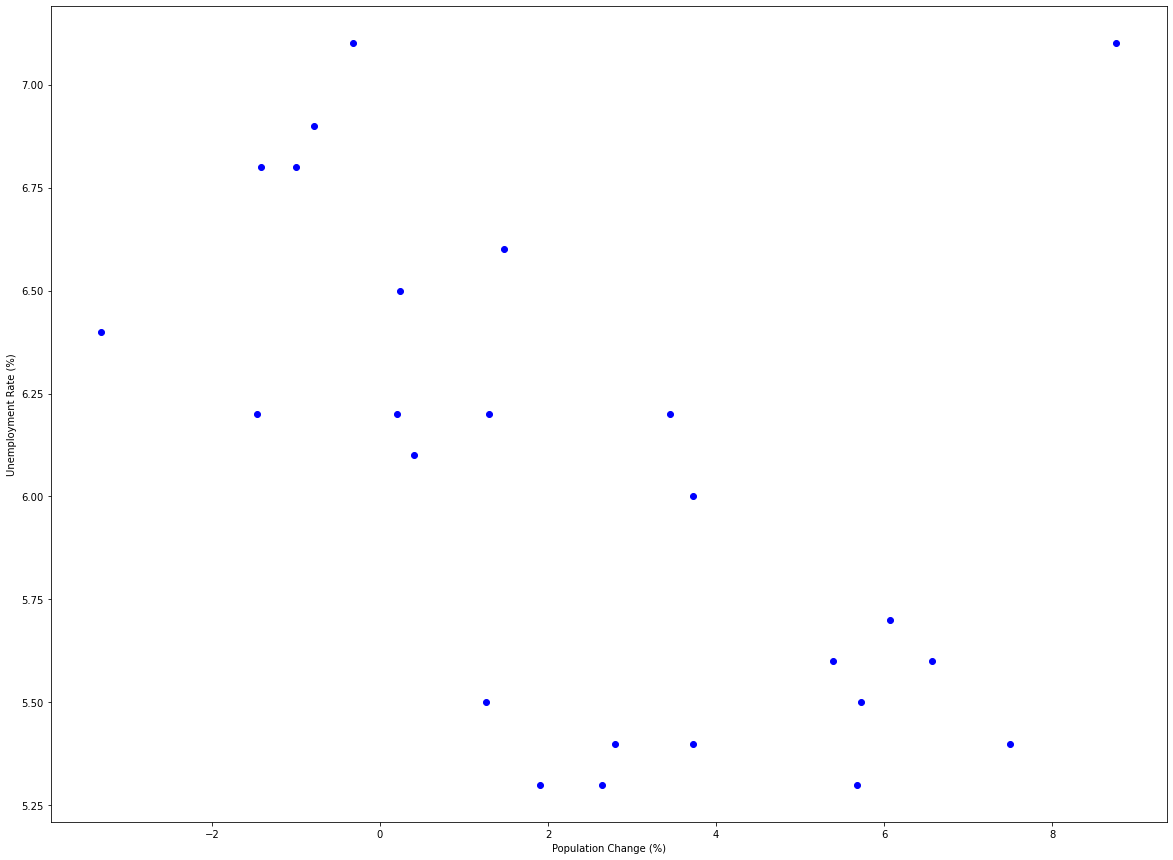

In [34]:
# create a scatter plot with matplotlib of population change percentage vs unemployment rate
plt.figure(figsize=(20,15))
plt.plot(state_unem_df["POP_CHANGE_PCT"], state_unem_df["Unemployment Rate"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

The correlation between both factors is -0.46


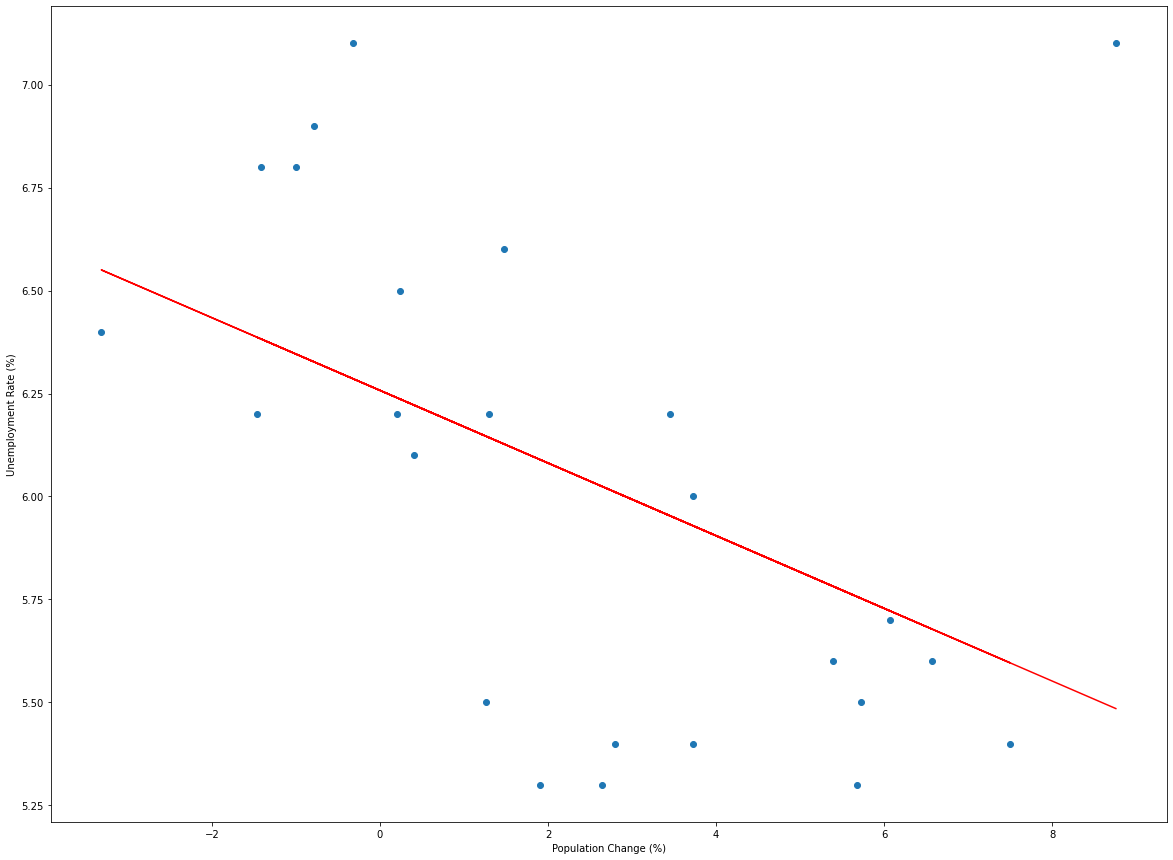

In [38]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_unem_df["POP_CHANGE_PCT"], state_unem_df["Unemployment Rate"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_unem_df["POP_CHANGE_PCT"]
y_values = state_unem_df["Unemployment Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (%)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

The correlation between both factors is -0.4


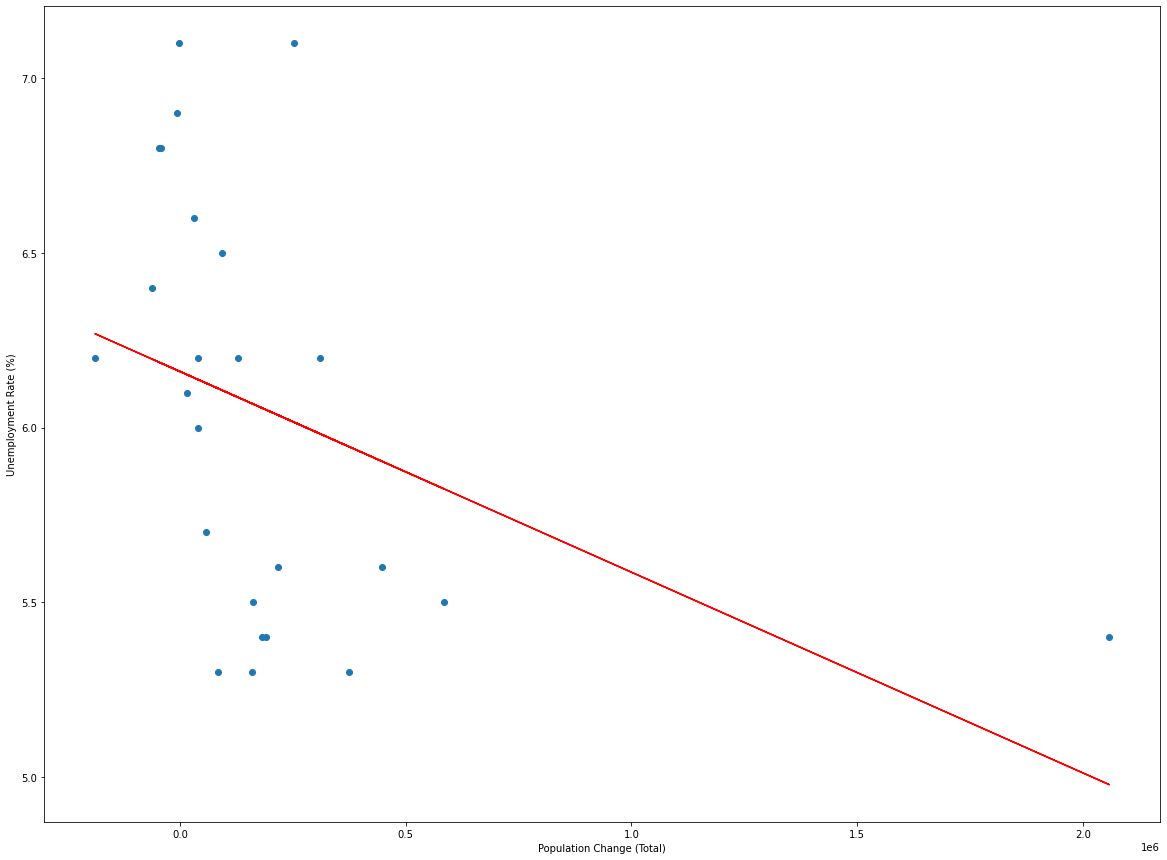

In [50]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_unem_df["POP_CHANGE_TOTAL"], state_unem_df["Unemployment Rate"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_unem_df["POP_CHANGE_TOTAL"]
y_values = state_unem_df["Unemployment Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (Total)")
plt.ylabel("Unemployment Rate (%)")
plt.show()

In [37]:
# create a new dataframe with the top 25 states in poverty rate
state_pov_df = state_df2.sort_values(by=["Poverty Rate"], ascending=False).head(25)
# create a plot of population change percentage vs poverty rate
state_plot4 = state_pov_df.hvplot.scatter(x="POP_CHANGE_PCT", y="Poverty Rate", color='State', title="Population Percentage Change vs Poverty Rate by State (2015-2021)", xlabel="Population Change (%)", ylabel="Poverty Rate (%)",c='POP_CHANGE_PCT',size=80, colorbar=True, height=1000, width=1500)
state_plot4

:Scatter   [POP_CHANGE_PCT]   (Poverty Rate,State)

In [45]:
# create a plot of population change total vs poverty rate
state_plot7 = state_pov_df.hvplot.scatter(x="POP_CHANGE_TOTAL", y="Poverty Rate", color='State', title="Population Total Change vs Poverty Rate by State (2015-2021)", xlabel="Population Change (Total)", ylabel="Poverty Rate (%)",c='POP_CHANGE_TOTAL',size=80, colorbar=True, height=1000, width=1500)
state_plot7

:Scatter   [POP_CHANGE_TOTAL]   (Poverty Rate,State)

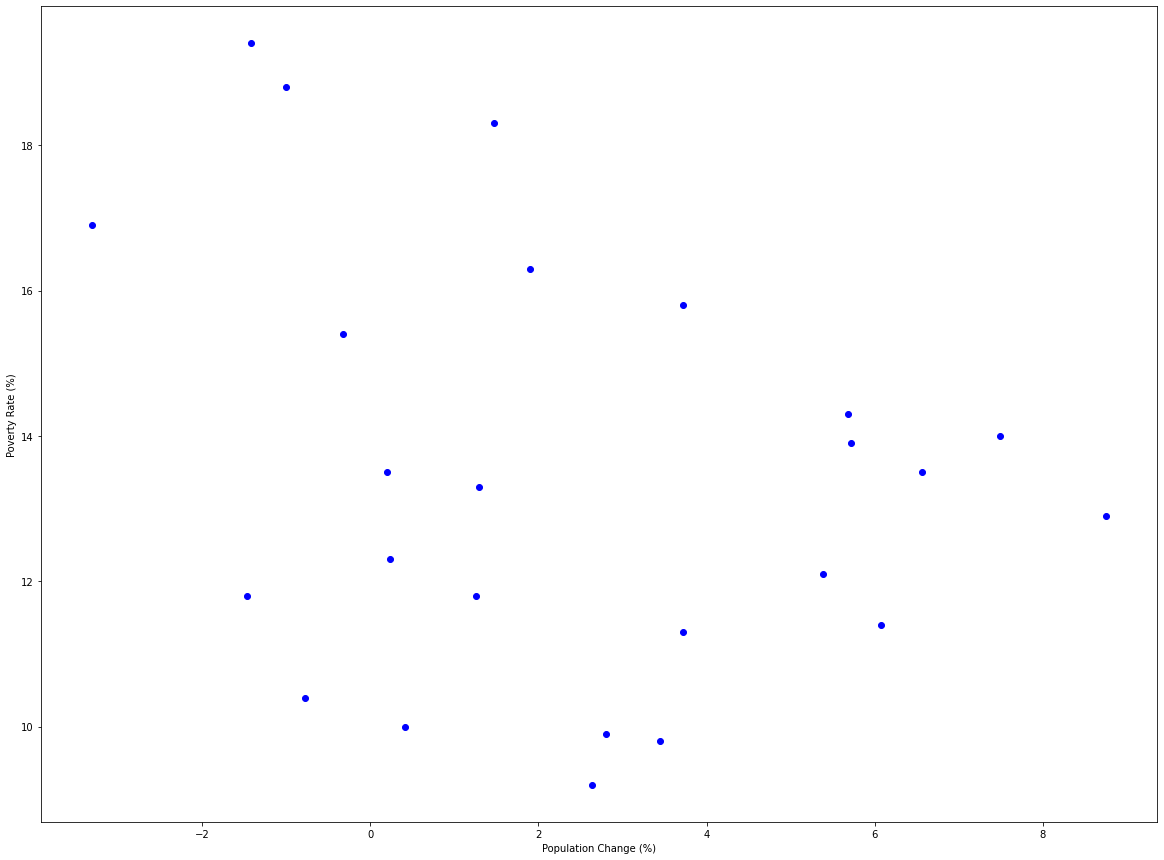

In [39]:
# create a scatter plot with matplotlib of population change percentage vs poverty rate
plt.figure(figsize=(20,15))
plt.plot(state_unem_df["POP_CHANGE_PCT"], state_unem_df["Poverty Rate"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (%)")
plt.ylabel("Poverty Rate (%)")
plt.show()

The correlation between both factors is -0.26


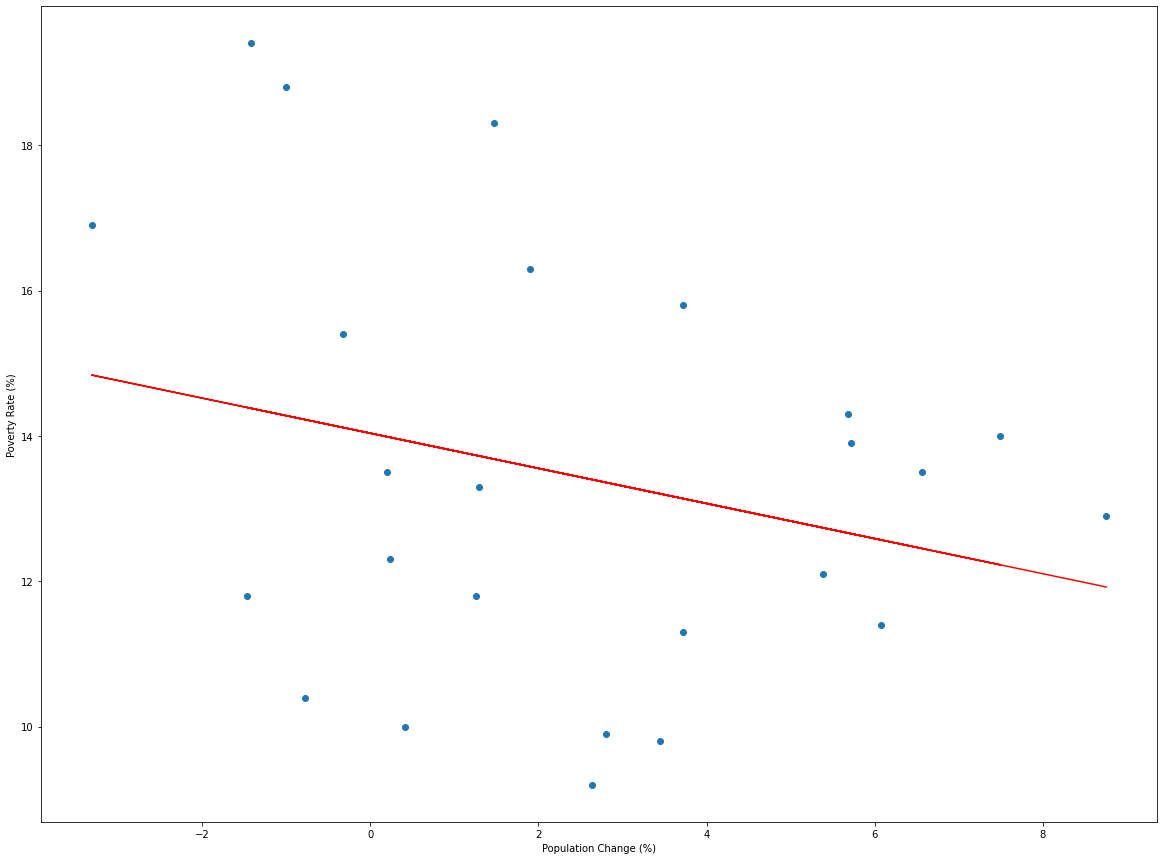

In [40]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_unem_df["POP_CHANGE_PCT"], state_unem_df["Poverty Rate"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_unem_df["POP_CHANGE_PCT"]
y_values = state_unem_df["Poverty Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (%)")
plt.ylabel("Poverty Rate (%)")
plt.show()

The correlation between both factors is -0.05


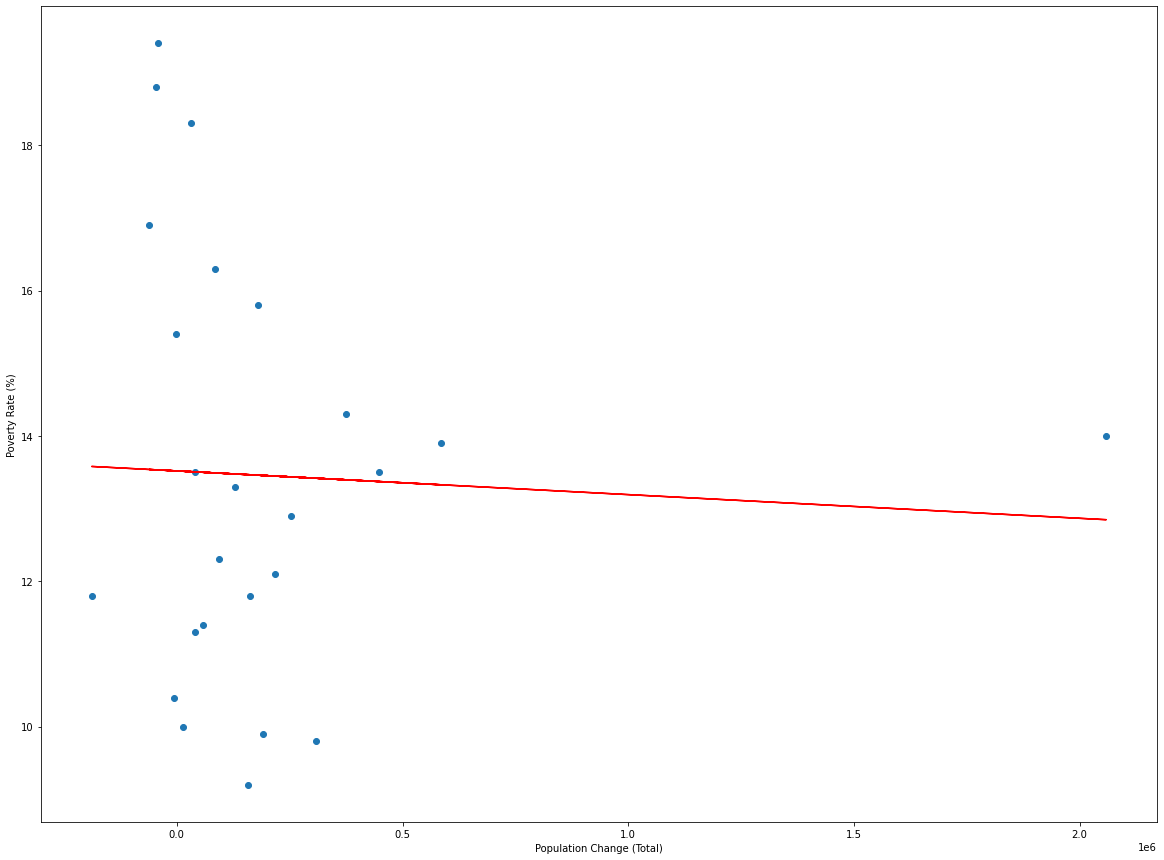

In [49]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_unem_df["POP_CHANGE_TOTAL"], state_unem_df["Poverty Rate"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_unem_df["POP_CHANGE_TOTAL"]
y_values = state_unem_df["Poverty Rate"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (Total)")
plt.ylabel("Poverty Rate (%)")
plt.show()

In [41]:
# create a new dataframe with the top 25 states in Percentage without Health Insurance
state_pwhi_df = state_df2.sort_values(by=["Percentage without Health Insurance"], ascending=False).head(25)
# create a plot of population change percentage vs poverty rate
state_plot5 = state_pwhi_df.hvplot.scatter(x="POP_CHANGE_PCT", y="Percentage without Health Insurance", color='State', title="Population Percentage Change vs Percentage without Health Insurance by State (2015-2021)", xlabel="Population Change (%)", ylabel="Without Health Insurance (%)",c='POP_CHANGE_PCT',size=80, colorbar=True, height=1000, width=1500)
state_plot5

:Scatter   [POP_CHANGE_PCT]   (Percentage without Health Insurance,State)

In [46]:
# create a plot of population change total vs Percentage without Health Insurance
state_plot8 = state_pwhi_df.hvplot.scatter(x="POP_CHANGE_TOTAL", y="Percentage without Health Insurance", color='State', title="Population Total Change vs Percentage without Health Insurance by State (2015-2021)", xlabel="Population Change (Total)", ylabel="Without Health Insurance (%)",c='POP_CHANGE_TOTAL',size=80, colorbar=True, height=1000, width=1500)
state_plot8

:Scatter   [POP_CHANGE_TOTAL]   (Percentage without Health Insurance,State)

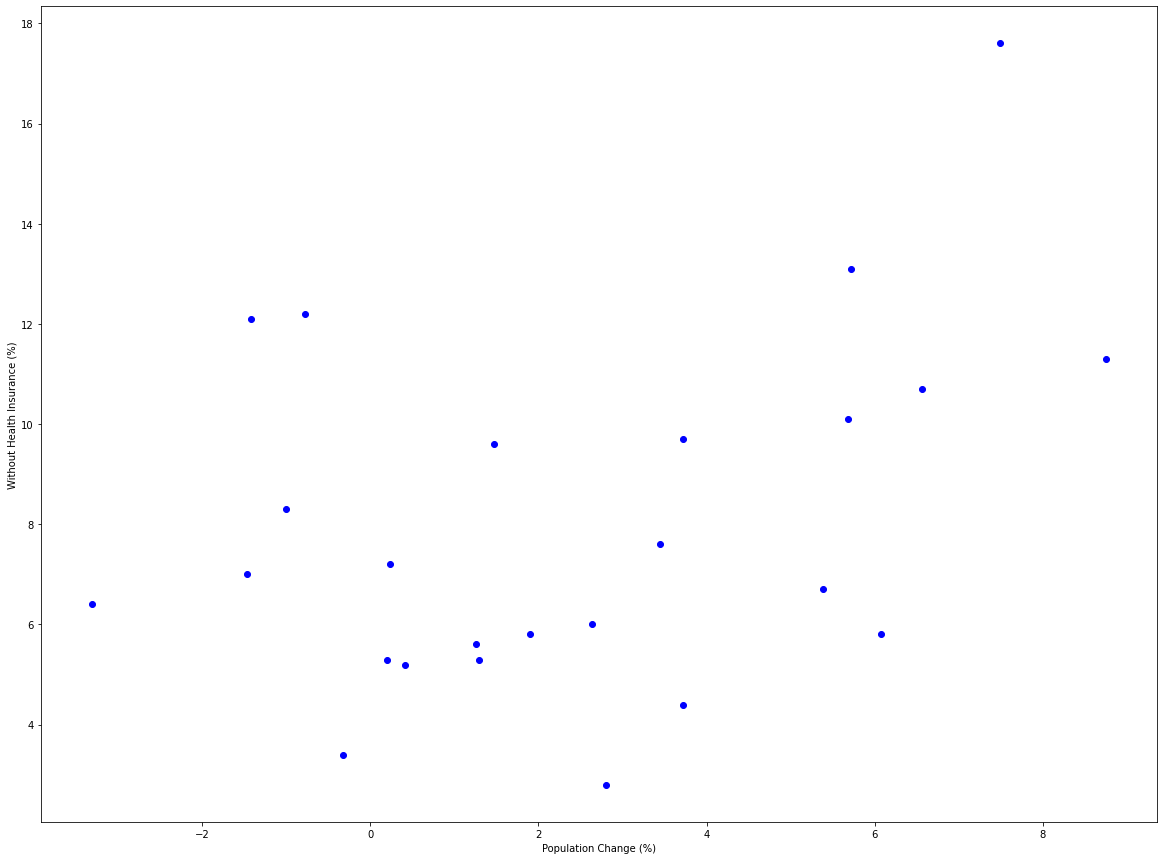

In [42]:
# create a scatter plot with matplotlib of population change percentage vs Percentage without Health Insurance
plt.figure(figsize=(20,15))
plt.plot(state_unem_df["POP_CHANGE_PCT"], state_unem_df["Percentage without Health Insurance"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (%)")
plt.ylabel("Without Health Insurance (%)")
plt.show()

The correlation between both factors is 0.38


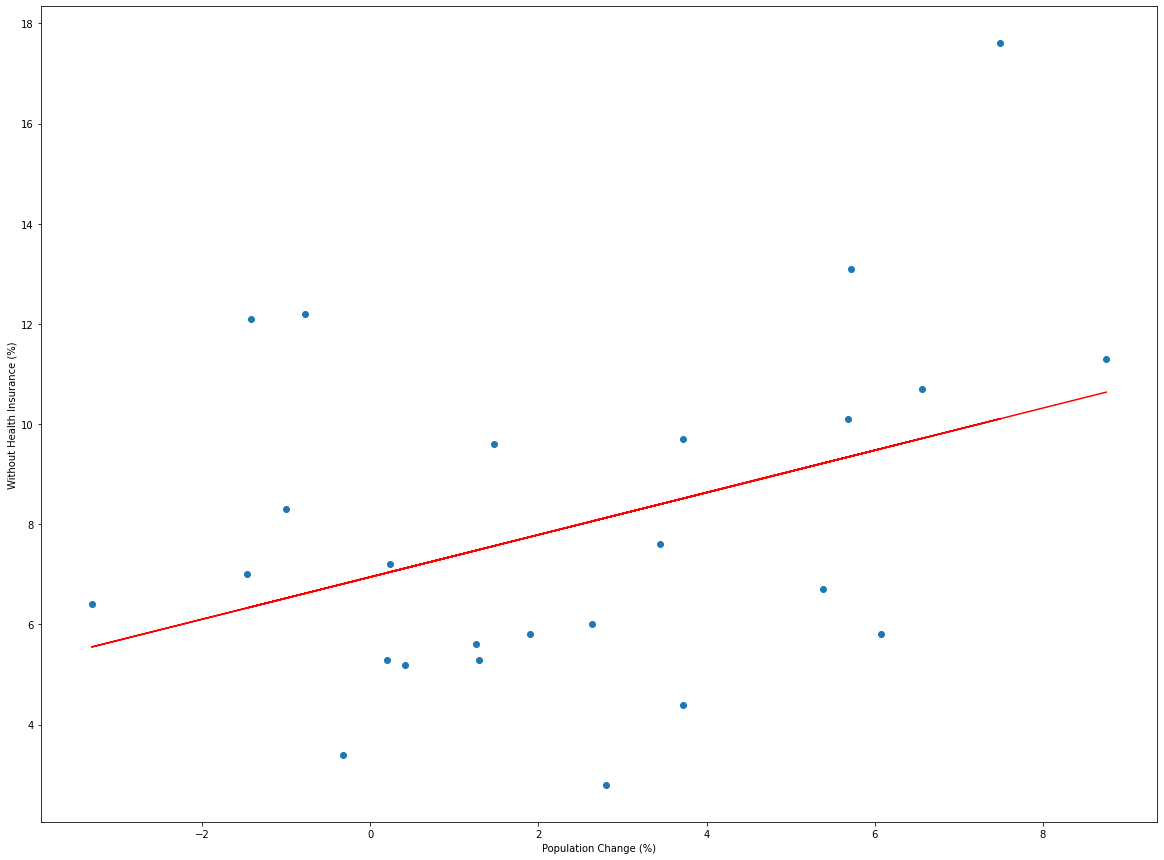

In [43]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_unem_df["POP_CHANGE_PCT"], state_unem_df["Percentage without Health Insurance"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_unem_df["POP_CHANGE_PCT"]
y_values = state_unem_df["Percentage without Health Insurance"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (%)")
plt.ylabel("Without Health Insurance (%)")
plt.show()

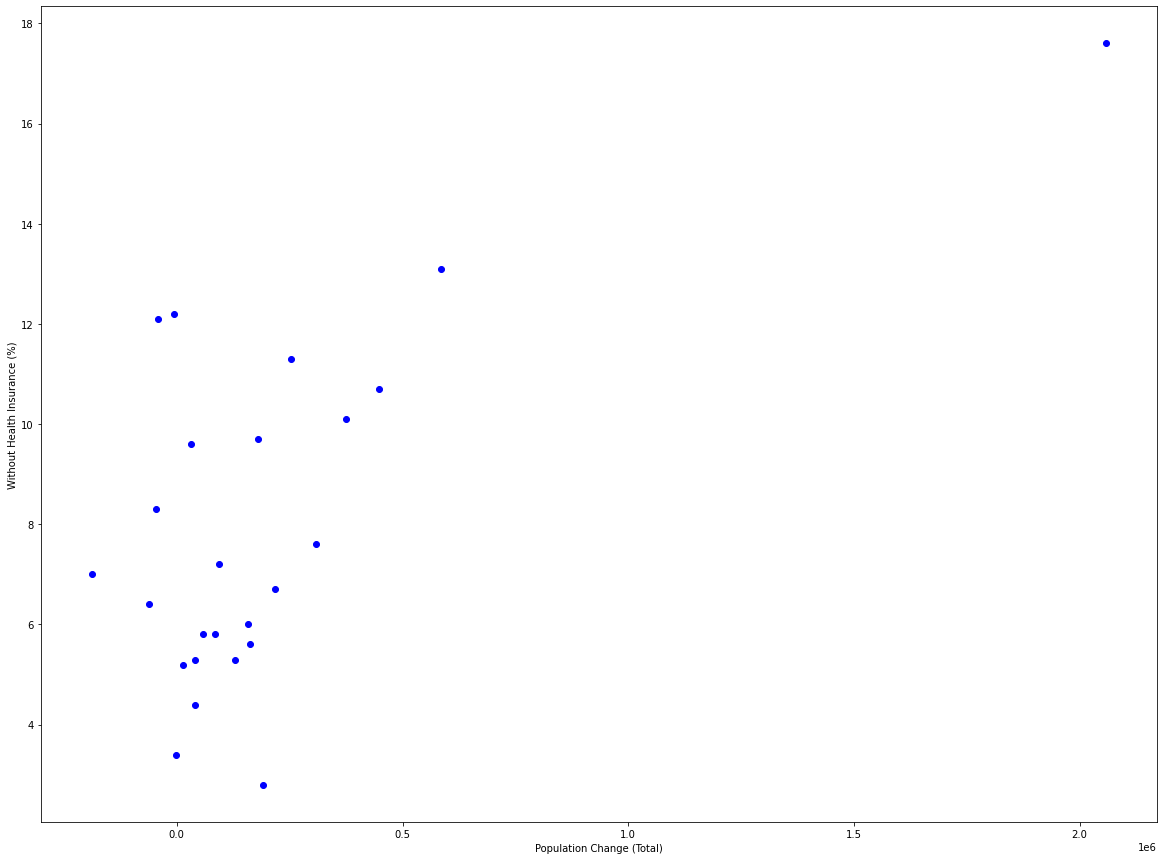

In [47]:
# create a scatter plot with matplotlib of population change total vs Percentage without Health Insurance
plt.figure(figsize=(20,15))
plt.plot(state_unem_df["POP_CHANGE_TOTAL"], state_unem_df["Percentage without Health Insurance"], marker="o", color="blue", linewidth=0)
plt.xlabel("Population Change (Total)")
plt.ylabel("Without Health Insurance (%)")
plt.show()

The correlation between both factors is 0.65


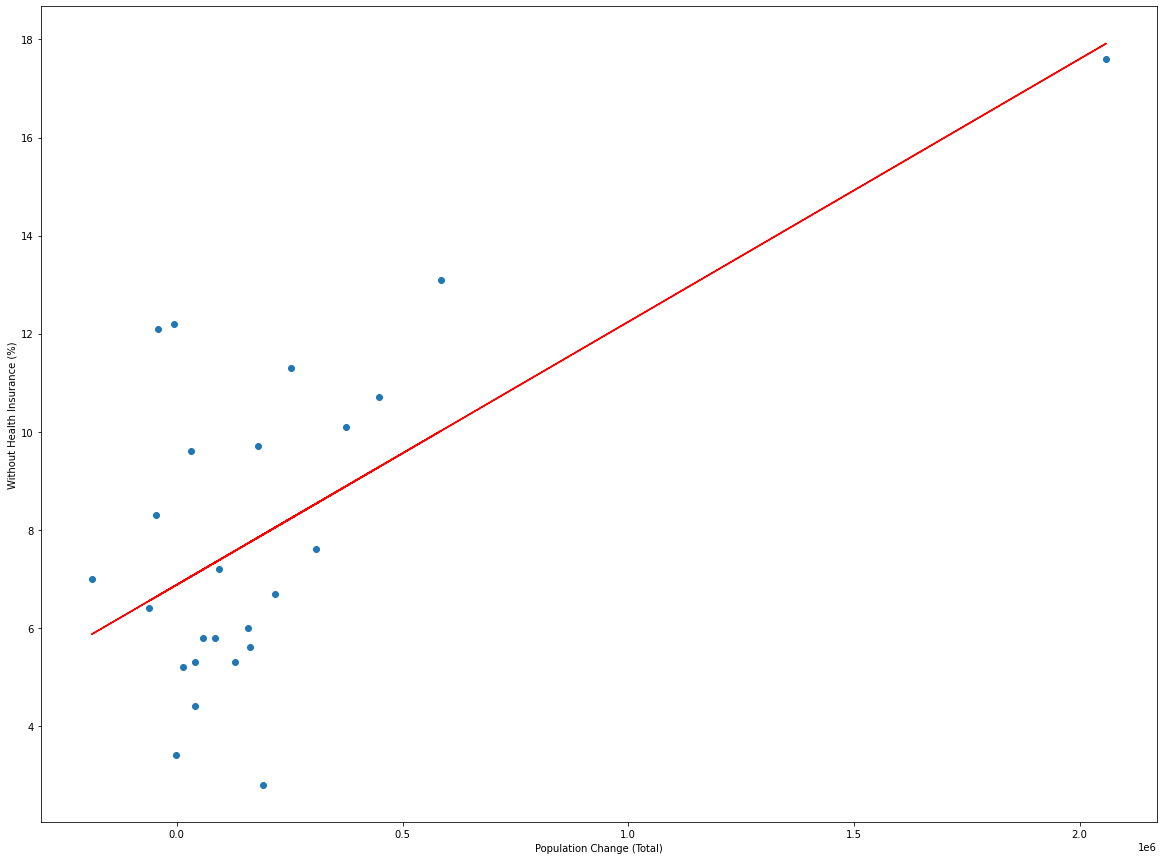

In [48]:
# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(state_unem_df["POP_CHANGE_TOTAL"], state_unem_df["Percentage without Health Insurance"])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values = state_unem_df["POP_CHANGE_TOTAL"]
y_values = state_unem_df["Percentage without Health Insurance"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Population Change (Total)")
plt.ylabel("Without Health Insurance (%)")
plt.show()